# Comparative Study of Random Forest and Gradient-Boosted Trees for Predicting Indonesian Public University Tuition Fees

## Exploratory Data Analysis

This notebook contains exploratory data analysis for our research project.

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [32]:
# Load the data
data_path = "../Data/data.csv"
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f"Data loaded successfully with shape: {df.shape}")
else:
    print(f"Data file not found at {data_path}")
    
print(f"Dataset info:")
print(df.info())

Data loaded successfully with shape: (702, 16)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Universitas    702 non-null    object 
 1   Program        702 non-null    object 
 2   Tahun          702 non-null    object 
 3   Penerimaan     702 non-null    object 
 4   Program_Studi  702 non-null    object 
 5   UKT-1          701 non-null    float64
 6   UKT-2          702 non-null    int64  
 7   UKT-3          702 non-null    int64  
 8   UKT-4          699 non-null    float64
 9   UKT-5          699 non-null    float64
 10  UKT-6          658 non-null    float64
 11  UKT-7          559 non-null    float64
 12  UKT-8          365 non-null    float64
 13  UKT-9          134 non-null    float64
 14  UKT-10         62 non-null     float64
 15  UKT-11         43 non-null     float64
dtypes: float64(9), int64(2), object(5)
me

In [33]:
# Display basic statistics
print("Dataset description:")
print(df.describe())

print("\nFirst few rows:")
print(df.head())

Dataset description:
              UKT-1         UKT-2         UKT-3         UKT-4         UKT-5  \
count  7.010000e+02  7.020000e+02  7.020000e+02  6.990000e+02  6.990000e+02   
mean   5.890157e+05  1.024359e+06  2.981236e+06  4.535811e+06  6.006242e+06   
std    7.401404e+05  8.742908e+05  1.169208e+06  1.615941e+06  2.253142e+06   
min    0.000000e+00  0.000000e+00  1.000000e+06  2.000000e+06  2.800000e+06   
25%    5.000000e+05  1.000000e+06  2.400000e+06  3.630000e+06  4.795000e+06   
50%    5.000000e+05  1.000000e+06  2.500000e+06  4.235000e+06  5.500000e+06   
75%    5.000000e+05  1.000000e+06  3.325000e+06  5.000000e+06  6.784000e+06   
max    1.010000e+07  1.120000e+07  1.500000e+07  1.750000e+07  2.250000e+07   

              UKT-6         UKT-7         UKT-8         UKT-9        UKT-10  \
count  6.580000e+02  5.590000e+02  3.650000e+02  1.340000e+02  6.200000e+01   
mean   7.470135e+06  8.053063e+06  8.797567e+06  1.246625e+07  1.627419e+07   
std    2.968209e+06  2.704882e

In [34]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Universitas        0
Program            0
Tahun              0
Penerimaan         0
Program_Studi      0
UKT-1              1
UKT-2              0
UKT-3              0
UKT-4              3
UKT-5              3
UKT-6             44
UKT-7            143
UKT-8            337
UKT-9            568
UKT-10           640
UKT-11           659
dtype: int64


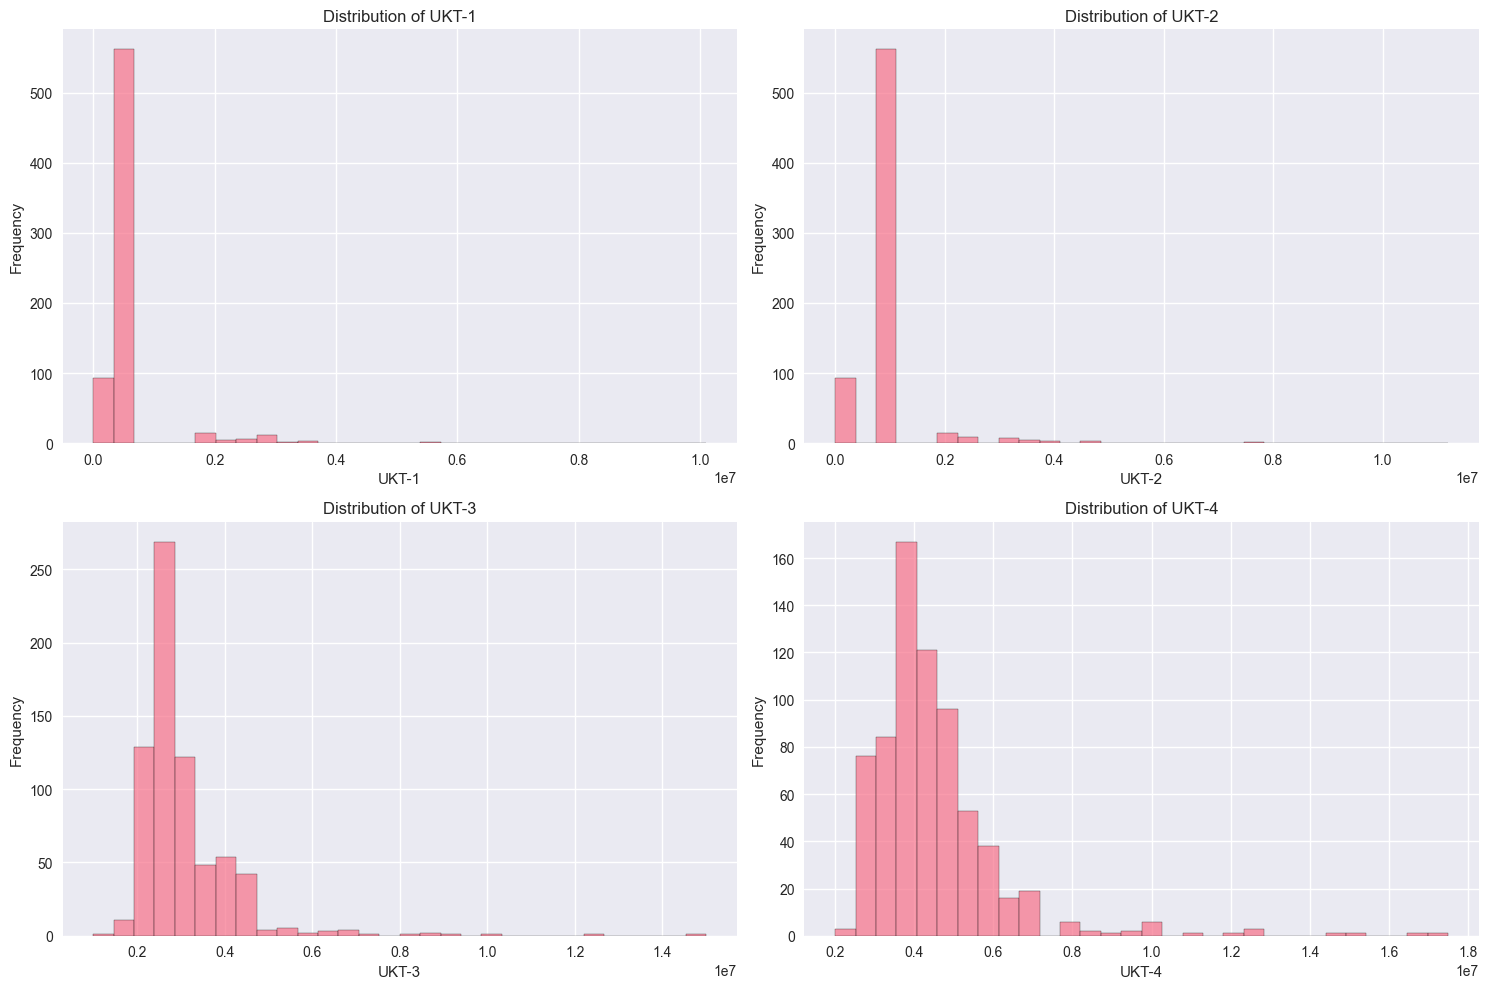

In [35]:
# Visualize distribution of target variables
target_cols = ['UKT-1', 'UKT-2', 'UKT-3', 'UKT-4']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(target_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Categorical columns: ['Universitas', 'Program', 'Tahun', 'Penerimaan', 'Program_Studi']


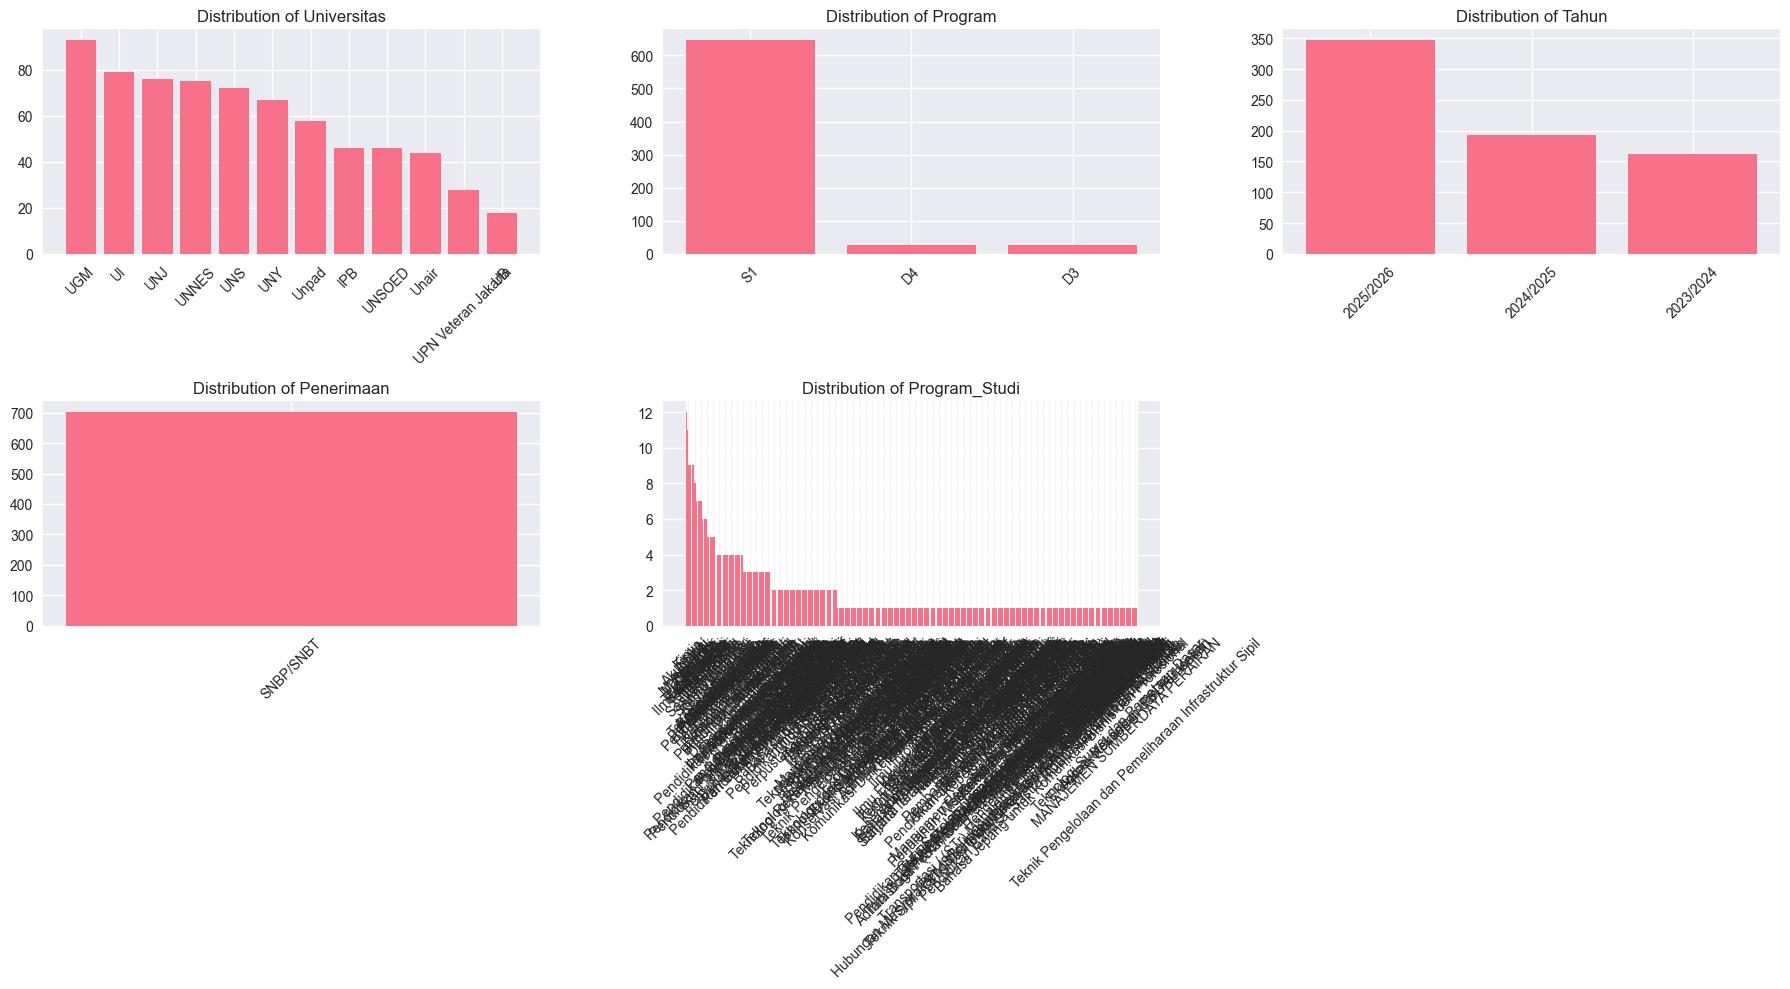

In [36]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

# Plot distributions of categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        value_counts = df[col].value_counts()
        axes[i].bar(value_counts.index, value_counts.values)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

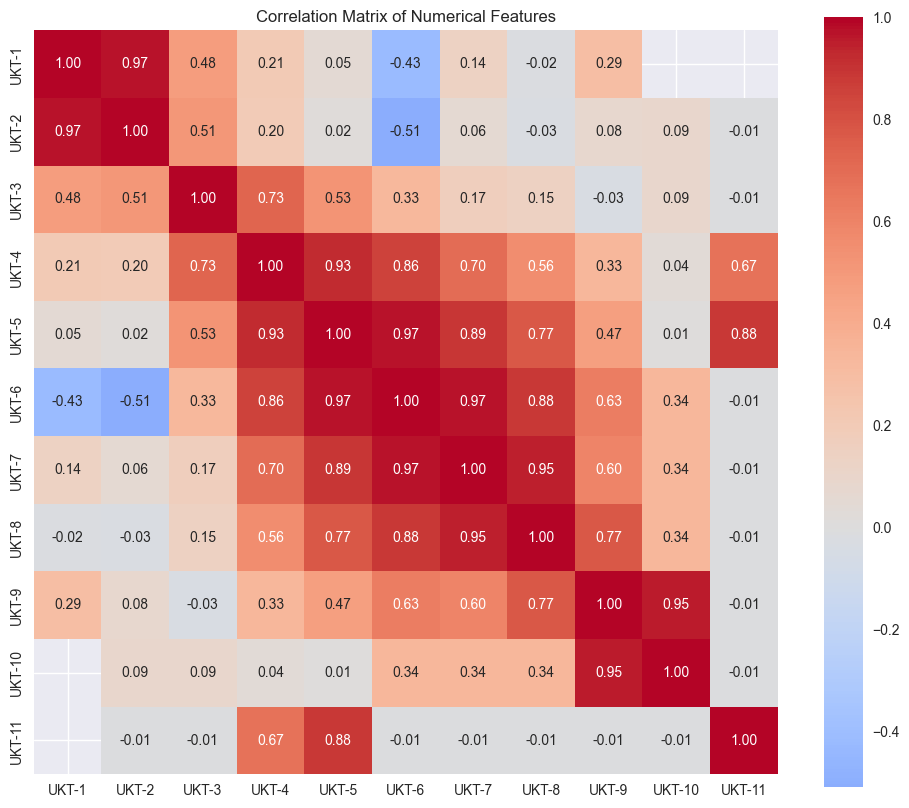

In [37]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

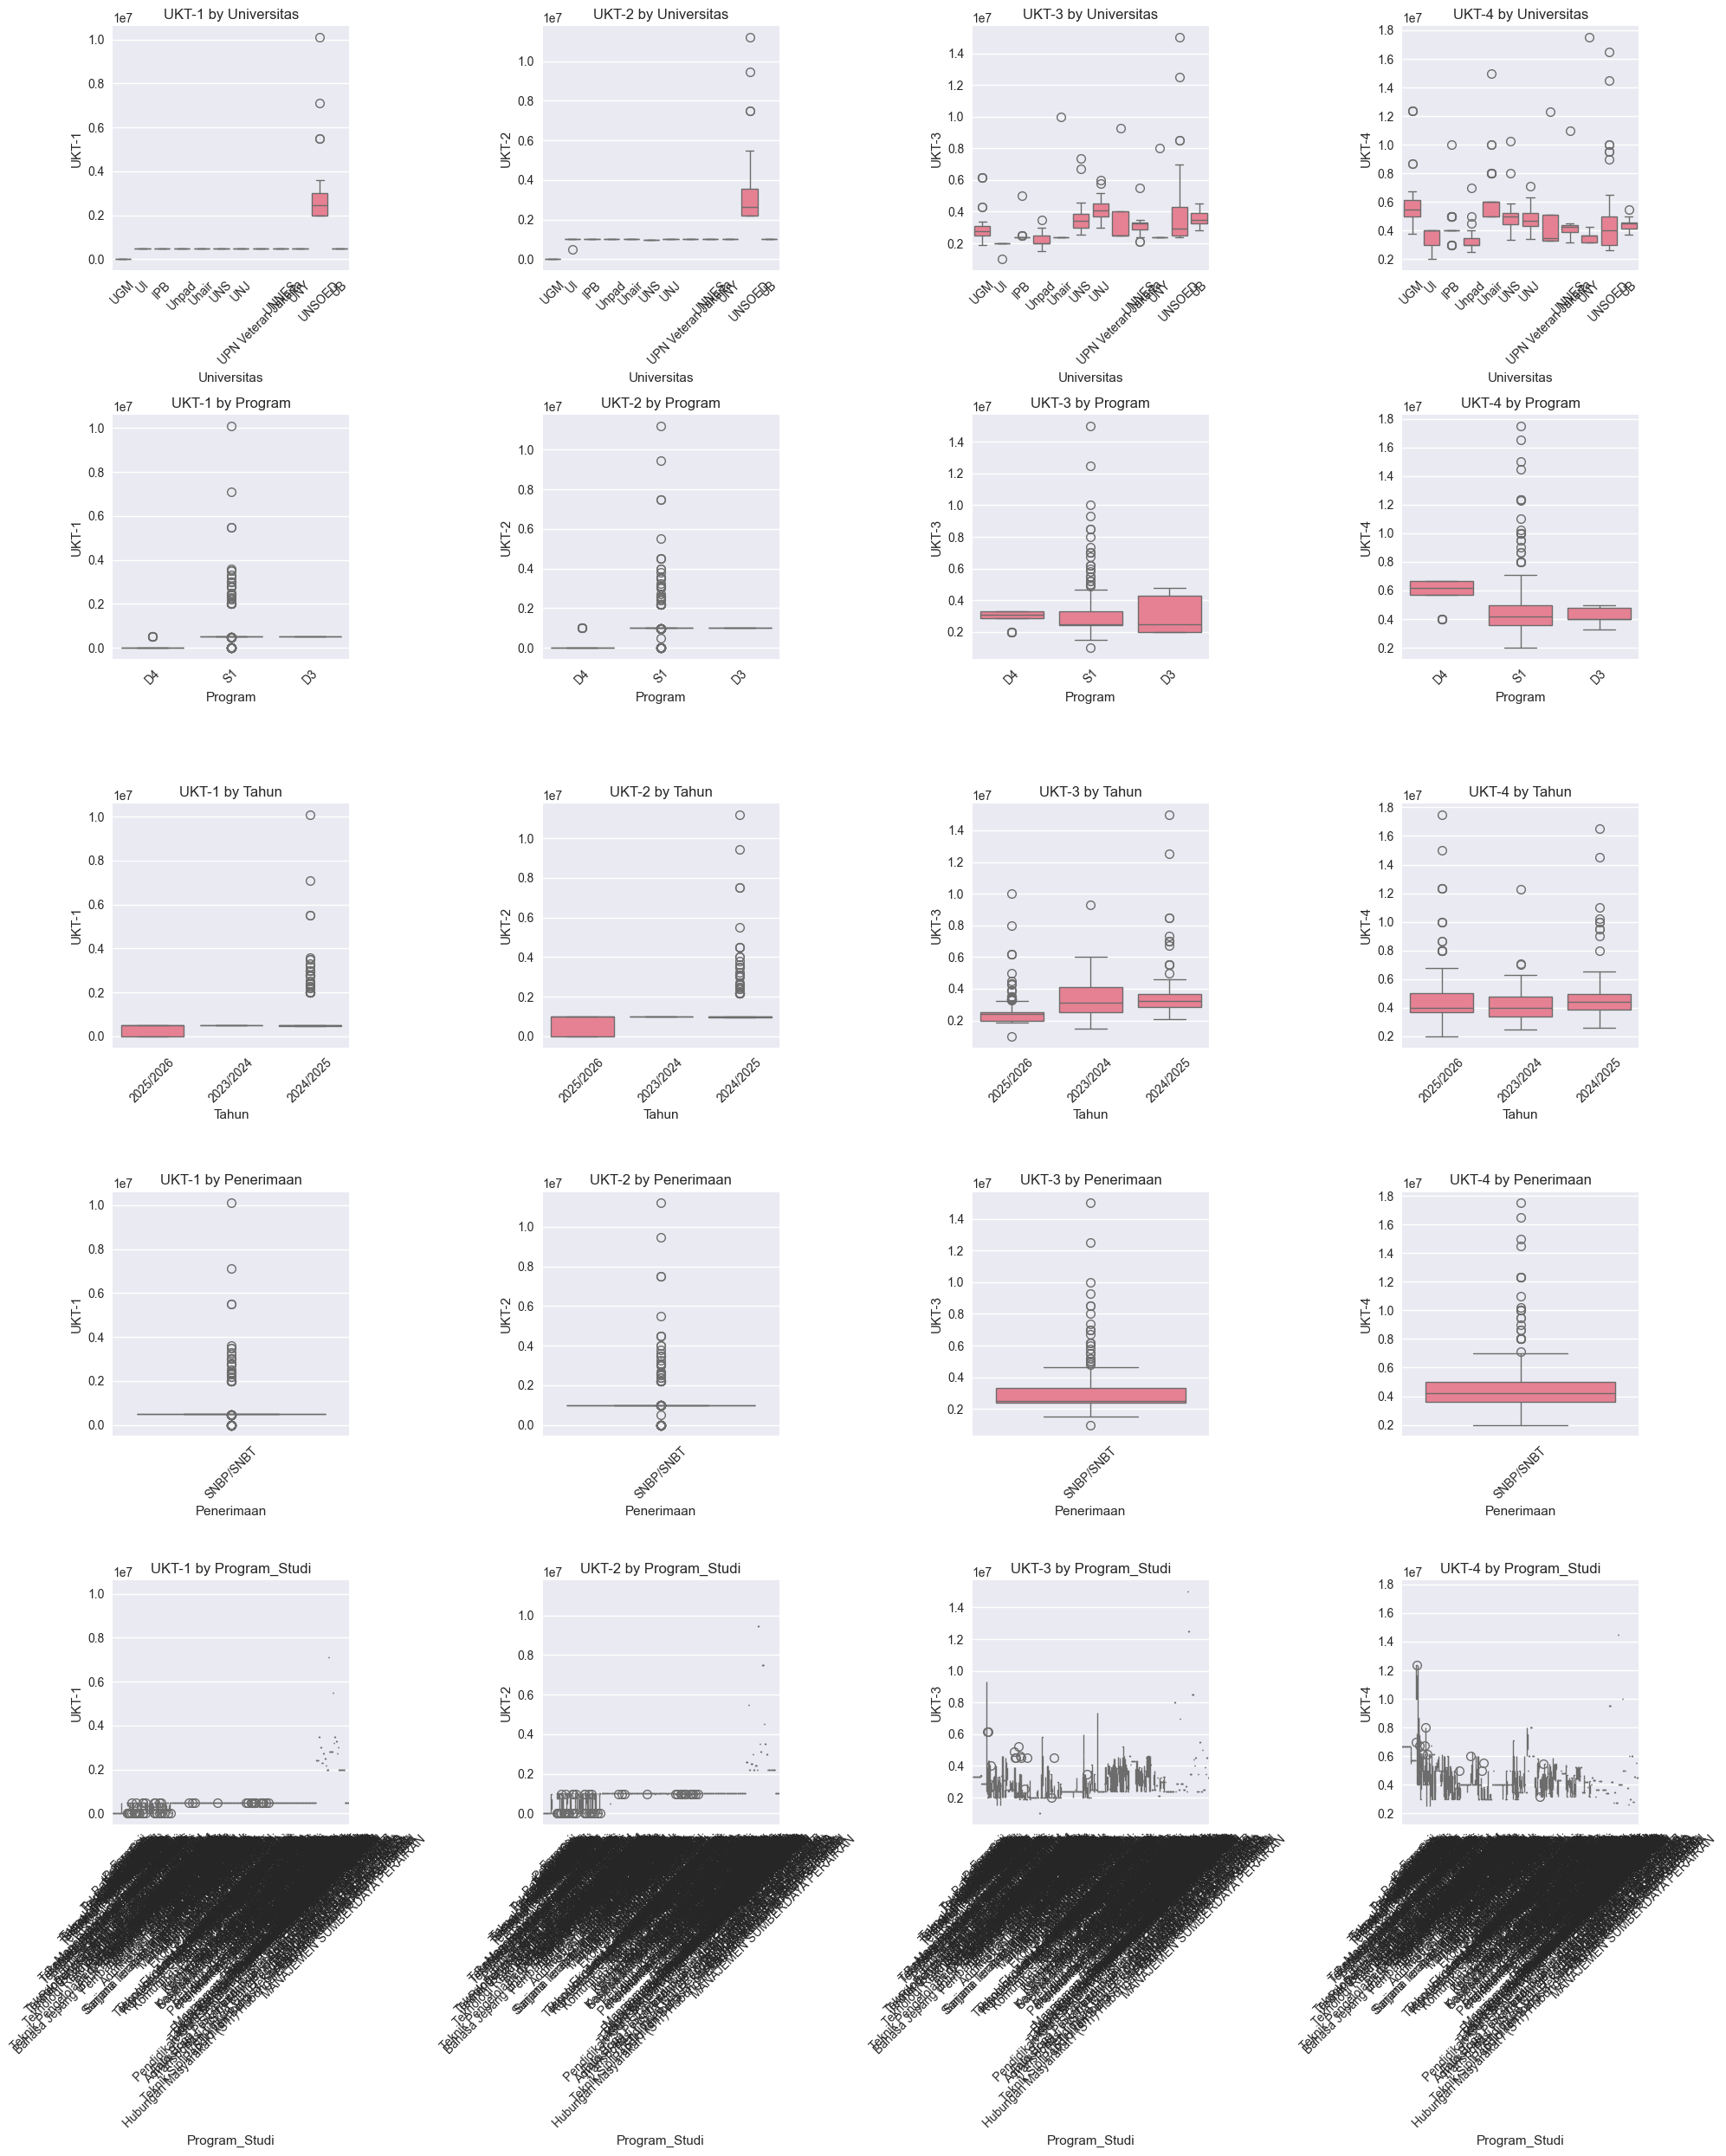

In [38]:
# Analyze relationship between categorical variables and target
# For each categorical variable, plot boxplots of target variables
fig, axes = plt.subplots(len(categorical_cols), len(target_cols), figsize=(20, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = axes.reshape(1, -1)

for i, cat_col in enumerate(categorical_cols):
    for j, target_col in enumerate(target_cols):
        sns.boxplot(data=df, x=cat_col, y=target_col, ax=axes[i, j])
        axes[i, j].set_title(f'{target_col} by {cat_col}')
        axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [39]:
# Summary statistics by categorical variables
for cat_col in categorical_cols:
    print(f"\nSummary of target variables by {cat_col}:")
    summary = df.groupby(cat_col)[target_cols].mean()
    print(summary)


Summary of target variables by Universitas:
                            UKT-1         UKT-2         UKT-3         UKT-4
Universitas                                                                
IPB                  5.000000e+05  1.000000e+06  2.465217e+06  4.152174e+06
UB                   5.000000e+05  1.000000e+06  3.572222e+06  4.452222e+06
UGM                  0.000000e+00  0.000000e+00  2.842129e+06  5.684290e+06
UI                   5.000000e+05  9.936709e+05  1.987342e+06  3.607595e+06
UNJ                  5.000000e+05  1.000000e+06  4.109211e+06  4.735526e+06
UNNES                5.000000e+05  1.000000e+06  3.143333e+06  4.243333e+06
UNS                  4.750000e+05  9.750000e+05  3.561250e+06  4.794347e+06
UNSOED               2.906522e+06  3.443478e+06  4.115217e+06  4.975581e+06
UNY                  5.000000e+05  1.000000e+06  2.483582e+06  3.777015e+06
UPN Veteran Jakarta  5.000000e+05  1.000000e+06  3.250000e+06  4.282143e+06
Unair                5.000000e+05  1.000000

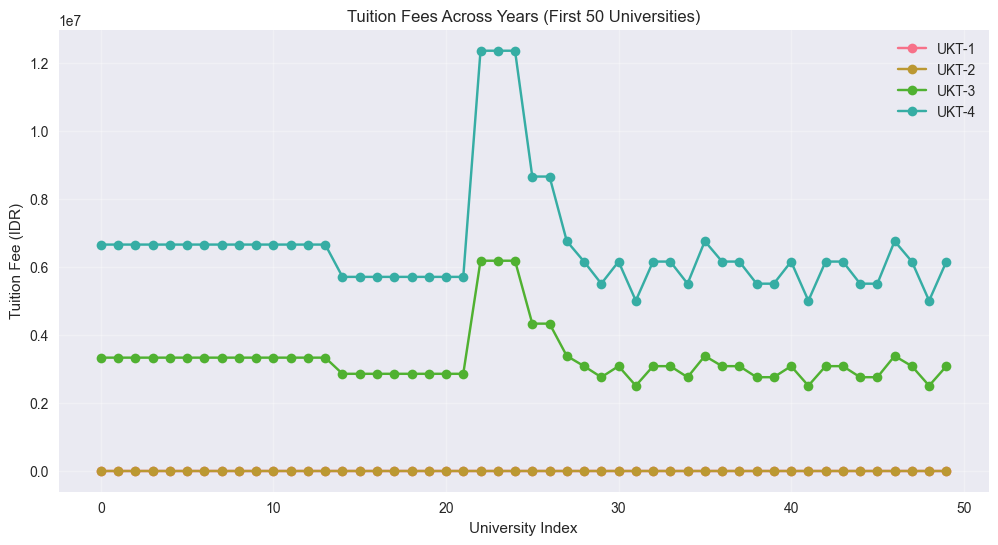

In [40]:
# Distribution of tuition fees across years
plt.figure(figsize=(12, 6))

for col in target_cols:
    plt.plot(df[col].head(50), label=col, marker='o')

plt.title('Tuition Fees Across Years (First 50 Universities)')
plt.xlabel('University Index')
plt.ylabel('Tuition Fee (IDR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [41]:
# Prepare for modeling - check for any preprocessing needs
print("Unique values in categorical variables:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

print(f"\nAny infinite values: {np.isinf(df.select_dtypes(include=[np.number])).any().any()}")
print(f"Any NaN values: {np.isnan(df.select_dtypes(include=[np.number])).any().any()}")

Unique values in categorical variables:
Universitas: ['UGM' 'UI' 'IPB' 'Unpad' 'Unair' 'UNS' 'UNJ' 'UPN Veteran Jakarta'
 'UNNES' 'UNY' 'UNSOED' 'UB']
Program: ['D4' 'S1' 'D3']
Tahun: ['2025/2026' '2023/2024' '2024/2025']
Penerimaan: ['SNBP/SNBT']
Program_Studi: ['Teknologi Rekayasa Perangkat Lunak' 'Teknologi Rekayasa Mesin'
 'Teknologi Rekayasa Elektro'
 'Teknologi Rekayasa Instrumentasi dan Kontrol'
 'Teknologi Survei dan Pemetaan Dasar' 'Sistem Informasi Geografis'
 'Pengembangan Produk Agroindustri'
 'Teknik Pengelolaan dan Perawatan Alat Berat'
 'Teknologi Rekayasa Internet'
 'Teknik Pengelolaan dan Pemeliharaan Infrastruktur Sipil'
 'Teknologi Rekayasa Pelaksanaan Bangunan Sipil' 'Teknologi Veteriner'
 'Manajemen Informasi Kesehatan' 'Pengelolaan Hutan'
 'Bisnis Perjalanan Wisata' 'Manajemen dan Penilaian Properti'
 'Pengelolaan Arsip dan Rekaman Informasi' 'Bahasa Inggris'
 'Bahasa Jepang untuk Komunikasi Bisnis dan Profesional'
 'Akuntansi Sektor Publik' 'Pembangunan Ekonomi K

In [42]:
# Save processed data if needed
processed_data_path = "../data/processed_data.csv"
df.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

Processed data saved to ../data/processed_data.csv
